In [ ]:
import numpy as np
import pandas as pd

np.random.seed(327)

N = 100  
R_values = [100, 1000, 10000, 100000]  

# Inverse transform sampling to generate random step sizes of the Cauchy-Lorentz distribution
def inverse_transform_cauchy(u):
    return 0.5 * np.tan(np.pi * (u - 0.5)) # F(u) in Exercise 4

walks_results = {}

# Generate R N-step random walks
for R in R_values:
    Xr = np.zeros(R)  # Initialize the start position of each random walks
    for step in range(N):
        u_samples = np.random.random(R)  
        step_sizes = inverse_transform_cauchy(u_samples)  # Transform to Cauchy-Lorentz distribution step sizes
        Xr += step_sizes 

    walks_results[R] = Xr

# Display the final positions of random walks for different values of R separately
for R in R_values:
    df_walks = pd.DataFrame(walks_results[R], columns=[f"Xr(N) for R={R}"])
    print(f"Random walk final position Xr(N) (R={R}):")
    print(df_walks.head(11))  # too long, only display first 11
    print("\n" + "="*50 + "\n")

Random walk final position Xr(N) (R=100):
    Xr(N) for R=100
0         20.842812
1         19.230622
2        -76.744674
3       -311.862113
4         23.366249
5        -81.234526
6         45.385245
7         70.110172
8         -0.606892
9          7.432229
10      -750.737050


Random walk final position Xr(N) (R=1000):
    Xr(N) for R=1000
0          -2.318909
1          70.061154
2         643.702745
3          22.775804
4          19.872706
5         -85.579690
6         296.695545
7         135.016797
8          14.046371
9        -411.630192
10       3038.746509


Random walk final position Xr(N) (R=10000):
    Xr(N) for R=10000
0        -1138.223394
1            5.446636
2           83.524543
3           41.272454
4           36.513236
5          -17.473128
6           21.035617
7            2.802315
8           15.390991
9           19.333982
10          12.184475


Random walk final position Xr(N) (R=100000):
    Xr(N) for R=100000
0           -27.117504
1            40.32

In [2]:
theta_values = [0.1, 0.5, 0.9] 
diffusion_results = []

for R in R_values:
    Xr = walks_results[R] 
    
    theta_results = []
    for theta in theta_values:
        len_theta = np.power(np.mean(np.power(np.abs(Xr), theta)), 1 / theta)  # Compute the difussion length
        theta_results.append(len_theta)
    
    diffusion_results.append([R] + theta_results)


df_diffusion = pd.DataFrame(diffusion_results, columns=["R", "θ=0.1", "θ=0.5", "θ=0.9"])
print(df_diffusion)

        R      θ=0.1       θ=0.5       θ=0.9
0     100  56.726695   85.565146  142.280314
1    1000  54.350322   89.120734  158.919833
2   10000  55.138819   96.593228  261.010807
3  100000  56.962097  100.039473  262.976605


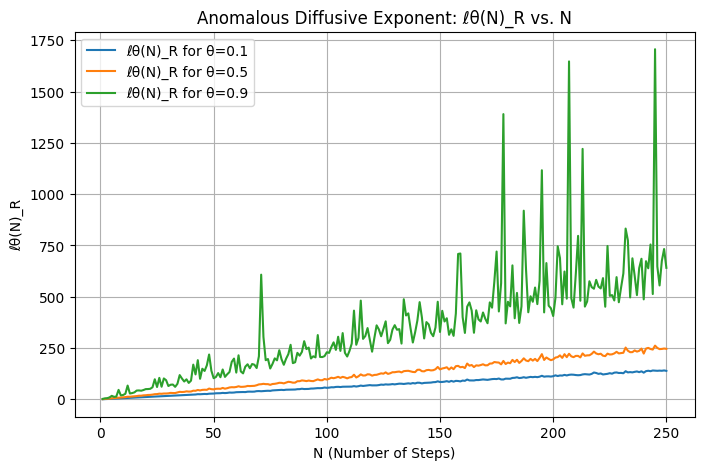

In [3]:
import matplotlib.pyplot as plt

np.random.seed(327)

R = 10000  
N_values = np.arange(1, 251) 
theta_values = [0.1, 0.5, 0.9]  

def inverse_transform_cauchy(u):
    return 0.5 * np.tan(np.pi * (u - 0.5))

# Store the difussion length ℓθ(N)_R
diffusion_results = {theta: [] for theta in theta_values}

# Compute ℓθ(N)_R
for N in N_values:
    Xr = np.zeros(R)  
    for step in range(N):
        u_samples = np.random.random(R)  
        step_sizes = inverse_transform_cauchy(u_samples)
        Xr += step_sizes  
    
    # Compute difussion lengths under different θ values
    for theta in theta_values:
        len_theta = np.power(np.mean(np.power(np.abs(Xr), theta)), 1 / theta) 
        diffusion_results[theta].append(len_theta)

# Plot the figure
plt.figure(figsize=(8, 5))
for theta in theta_values:
    plt.plot(N_values, diffusion_results[theta], label=f"ℓθ(N)_R for θ={theta}")

plt.xlabel("N (Number of Steps)")
plt.ylabel("ℓθ(N)_R")
plt.title("Anomalous Diffusive Exponent: ℓθ(N)_R vs. N")
plt.legend()
plt.grid()
plt.show()

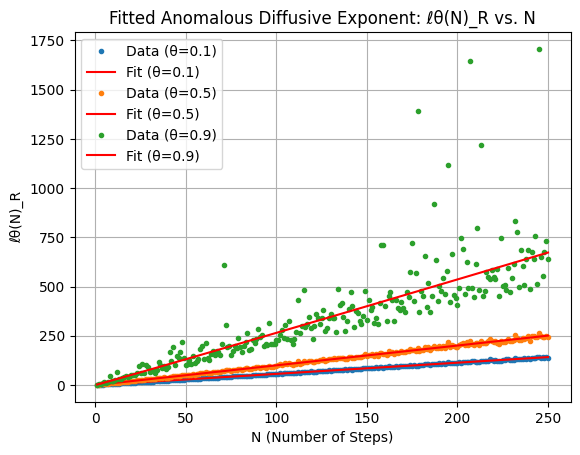

            D     alpha
0.1  0.563175  1.001265
0.5  0.979794  1.004295
0.9  2.453811  1.016657


In [4]:
# Take the log of both sides to get back to a linear relation: log(ℓθ(N)_R) = log(D) + α * log(N)
fit_results_log = {}

for theta in theta_values:
    logN = np.log(N_values)  
    logL = np.log(diffusion_results[theta]) 
    
    output = np.polyfit(logN, logL, 1)
    alpha_fit = output[-2]  
    D_fit = np.exp(output[-1])  

    fit_results_log[theta] = {"D": D_fit, "alpha": alpha_fit}


    # Plot data points
    plt.plot(N_values, diffusion_results[theta], linestyle='None', marker=".", label=f"Data (θ={theta})")
    
    # Generate the fit line
    fit_N = np.linspace(1, 250, 100)
    fit_L = D_fit * np.power(fit_N, alpha_fit)
    plt.plot(fit_N, fit_L, 'r', label=f"Fit (θ={theta})")

plt.xlabel("N (Number of Steps)")
plt.ylabel("ℓθ(N)_R")
plt.title("Fitted Anomalous Diffusive Exponent: ℓθ(N)_R vs. N")
plt.legend()
plt.grid()
plt.show()


df_fit_log = pd.DataFrame.from_dict(fit_results_log, orient="index", columns=["D", "alpha"])
print(df_fit_log)


The results for D and α are listed above.  

Comment:  
D shows high sensitivity to θ : D increases significantly as θ increases.  
α shows low sensitivity to θ  : α remains close to 1 with a slight increase as θ increases.  